# Fragility models for berth structures subjected to storms

In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Balomenos and Padgett (2018)

In [7]:
def pile_connection_pf_balomenos(IM, params):
    '''
    Description:
    Fragility models for pile connections in wharves and piers.
    Only uplift failure mode.

    Input:
    IM: dict
    IM['Hmax']: maximum wave height (m), range = [0,8m]
    IM['Zc']: relative surge elevation (clearance) (m), range = [-2,2m]

    params: dict
    params['moment']: moment connection type, 'full' or 'partial'
    params['comp_zone']: compression zone, 'in' or 'out'
    
    Output:
    pf = connection probability of failure

    Source:
    Balomenos, G. P., & Padgett, J. E. (2018). 
    Fragility Analysis of Pile-Supported Wharves and Piers Exposed to 
    Storm Surge and Waves.
    Journal of Waterway, Port, Coastal, and Ocean Engineering, 144(2), 04017046. 
    https://doi.org/10.1061/(ASCE)WW.1943-5460.0000436
    
    '''
    import numpy as np

    Hmax = IM['Hmax']
    Zc = IM['Zc']

    moment = params['moment']
    comp_zone = params['comp_zone']

    if moment == 'full' and comp_zone == 'in':
        g = -27.06 + 9.02*Hmax - 1.88*Zc + 0.18*Hmax*Zc - Hmax**2 + 0.04*Hmax**3

    elif moment == 'full' and comp_zone == 'out':
        g = -26.89 + 11.35*Hmax - 2.50*Zc + 0.30*Hmax*Zc - 1.62*Hmax**2 + 0.09*Hmax**3

    elif moment == 'partial' and comp_zone == 'in':
        g = -15.01 + 6.12*Hmax - 2.87*Zc + 0.39*Hmax*Zc - 0.61*Hmax**2 - 0.28*Zc**2 + 0.03*Hmax**3
    
    elif moment == 'partial' and comp_zone == 'out':
        g = -20.945 + 13.27*Hmax - 4.73*Zc + 0.90*Hmax*Zc - 2.71*Hmax**2 - 0.5*Zc**2 + 0.23*Hmax**3
    
    pf = np.exp(g)/(1+np.exp(g))

    return pf

Plotting fragility curves:

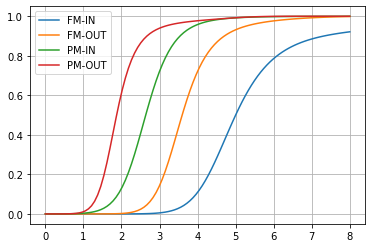

In [3]:
xdata = np.linspace(0.001,8,100)

y1, y2, y3, y4 = ([] for i in range(4))

for x in xdata:
    y1.append(pile_connection_pf_balomenos(IM=dict([('Hmax',x),('Zc',-2)]),
                                      params=dict([('moment','full'),('comp_zone','in')])))
    y2.append(pile_connection_pf_balomenos(IM=dict([('Hmax',x),('Zc',-2)]),
                                      params=dict([('moment','full'),('comp_zone','out')])))
    y3.append(pile_connection_pf_balomenos(IM=dict([('Hmax',x),('Zc',-2)]),
                                      params=dict([('moment','partial'),('comp_zone','in')])))
    y4.append(pile_connection_pf_balomenos(IM=dict([('Hmax',x),('Zc',-2)]),
                                      params=dict([('moment','partial'),('comp_zone','out')])))

plt.plot(xdata, y1, label='FM-IN')
plt.plot(xdata, y2, label='FM-OUT')
plt.plot(xdata, y3, label='PM-IN')
plt.plot(xdata, y4, label='PM-OUT')
plt.legend()
plt.grid()
plt.show()

Fragility plots from reference:

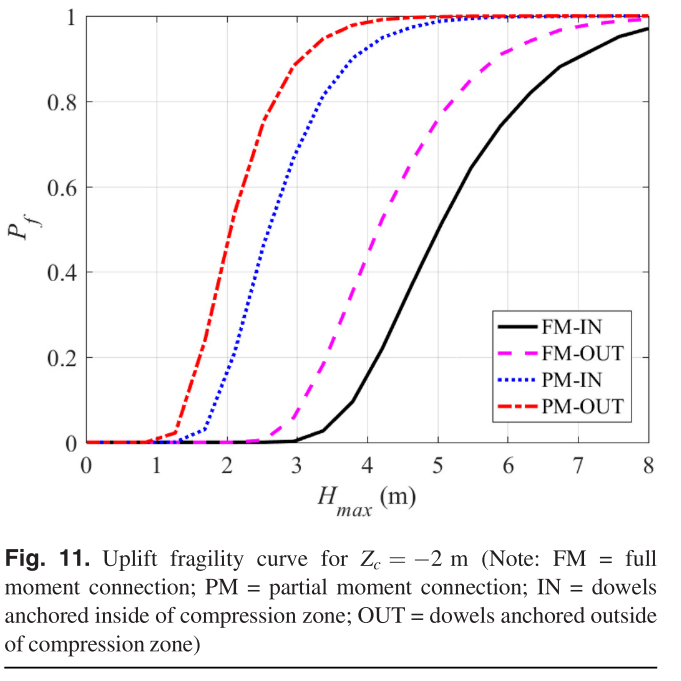

# Maniglio et al. (2021)

Parameterized coastal fragilities and their application to aging port structures subjected to surge and wave

Maniglio, M., Balomenos, G. P., Padgett, J. E., & Cimellaro, G. P. (2021). Parameterized coastal fragilities and their application to aging port structures subjected to surge and wave. Engineering Structures, 237(January), 112235. https://doi.org/10.1016/j.engstruct.2021.112235

In [8]:
def pile_connection_pf_uplift_maniglio(IM, params):
    '''
    Description:
    Fragility model for pile connections in wharves and piers.
    Uplift failure mode, considering aging effects

    Input:
    Hmax = IM['Hmax'] #Maximum wave height
    Zc   = IM['Zc'] #Relative surge elevation (positive is water below deck)

    bh   = params['bh'] #Deck thickness (m)
    bl   = params['bl'] #Deck length (m)
    bw   = params['bw'] #Deck width (m)
    dse  = params['dse'] #Dowel diameter (m)
    nb   = params['nb'] #Number of dowels
    pos  = params['pos'] # Pile position = 'internal' or 'seaward'
    
    Output:
    pf = connection probability of failure due to uplift

    Source:
    Maniglio, M., Balomenos, G. P., Padgett, J. E., & Cimellaro, G. P. (2021).
    Parameterized coastal fragilities and their application to aging port structures subjected to surge and wave.
    Engineering Structures, 237(January), 112235. https://doi.org/10.1016/j.engstruct.2021.112235
    '''

    import numpy as np

    Hmax = IM['Hmax'] #Maximum wave height
    Zc   = IM['Zc'] #Relative surge elevation (positive is water below deck)

    bh   = params['bh'] #Deck thickness (m)
    bl   = params['bl'] #Deck length (m)
    bw   = params['bw'] #Deck width (m)
    dse  = params['dse'] #Dowel diameter (m)
    nb   = params['nb'] #Number of dowels
    pos  = params['pos'] # Pile position = 'internal' or 'seaward'

    if pos == 'internal':

        logit = -14.654 + 6.2338*Hmax - 3.4827*Zc \
                - 30.34*bh + 2.6329*bl + 1.8639*bw - 216.59*dse \
                - 0.49599*nb + 0.62134*Hmax*Zc - 0.59376*Hmax**2 \
                - 0.53821*Zc**2 + 13.322*bh**2 - 0.12446*bl**2 \
                - 0.064453*bw**2 - 0.029003*Hmax**2*Zc \
                + 0.097103*Hmax*Zc**2 + 0.021735*Hmax**3 \
                - 0.0043198*Hmax**2*Zc**2
    
    elif pos == 'seaward':

        logit = -8.8361 + 5.8162*Hmax - 3.8618*Zc \
                - 28.851*bh + 2.9167*bl + 1.9991*bw \
                - 206.19*dse - 1.4172*nb + 0.78347*Hmax*Zc \
                - 0.53459*Hmax**2 - 0.78347*Zc**2 + 11.851*bh**2 \
                - 0.14821*bl**2 + 0.037589*bw**2 - 0.042766*Hmax**2*Zc \
                + 0.14262*Hmax*Zc**2 + 0.019439*Hmax**3 \
                - 0.065198*Zc**3 - 0.006523*Hmax**2*Zc**2 \
                + 0.0068831*Hmax*Zc**3
    
    pf = np.exp(logit)/(1+np.exp(logit))

    return pf

In [9]:
def pile_connection_pf_flexural_maniglio(IM, params):
    '''
    Description:
    Fragility model for pile connections in wharves and piers.
    Flexural failure only for seaward piles, considering aging effects.

    Input:
    Hmax = IM['Hmax'] #Maximum wave height (m)
    Zc   = IM['Zc'] #Relative surge elevation (positive is water below deck) (m)

    b1   = params['b1'] #Cantilever length (m)
    b2   = params['b2'] #First span length (m)
    bh   = params['bh'] #Deck thickness (m)
    bw   = params['bw'] #Deck width (m)
    dse  = params['dse'] #Dowel diameter (m)
    nb   = params['nb'] #Number of dowels
    dp   = params['dp'] #Pile diameter (m)
    t    = params['t'] #Time (years)
    X    = params['X'] # Concrete cover (cm)
    depth = params['depth'] #Pile height (m)
    corr  = params['corr'] #Corrosion type: 'uniform' or 'pitting'
    
    Output:
    pf = connection probability of failure due to uplift

    Source:
    Maniglio, M., Balomenos, G. P., Padgett, J. E., & Cimellaro, G. P. (2021).
    Parameterized coastal fragilities and their application to aging port structures subjected to surge and wave.
    Engineering Structures, 237(January), 112235. https://doi.org/10.1016/j.engstruct.2021.112235
    '''
    import numpy as np
    
    Hmax = IM['Hmax'] #Maximum wave height (m)
    Zc   = IM['Zc'] #Relative surge elevation (positive is water below deck) (m)

    b1   = params['b1'] #Cantilever length (m)
    b2   = params['b2'] #First span length (m)
    bh   = params['bh'] #Deck thickness (m)
    bw   = params['bw'] #Deck width (m)
    dse  = params['dse'] #Dowel diameter (m)
    nb   = params['nb'] #Number of dowels
    dp   = params['dp'] #Pile diameter (m)
    t    = params['t'] #Time (years)
    X    = params['X'] # Concrete cover (cm)
    depth = params['depth'] #Pile height (m)
    corr  = params['corr'] #Corrosion type: 'uniform' or 'pitting'

    if corr == 'uniform':

        logit = 7.3471 + 2.791*Hmax - 3.1557*Zc + 0.40065*depth - 1.8352*bh + 0.42456*b1 - 0.27151*b2 + 0.019989*bw \
                + 0.75947*dp - 414.19*dse - 0.70704*nb + 0.011253*t + 0.42697*Hmax*Zc + 0.043476*Hmax*b2 \
                + 0.022533*Hmax*bw - 0.035697*Zc*depth + 27.799*Zc*dse + 0.03824*Zc*nb - 0.023764*nb*depth - 0.094056*b1*bw \
                + 14.193*bw*dse + 0.021738*bw*nb - 0.38302*Hmax**2 + 0.22222*Zc**2 - 0.023178*bw**2 + 0.021518*nb**2 \
                - 0.024721*Hmax**2*Zc + 0.032323*Hmax*Zc**2 + 0.01736*Hmax**3
    
    elif corr == 'pitting':

        logit = 16.653 + 1.4314*Hmax - 2.6166*Zc + 0.11173*depth - 1.58342*bh + 0.29456*b1 - 0.2446*b2 + 0.29089*bw \
                - 416.49*dse - 0.55746*nb - 0.81204*X + 0.099918*t + 0.14032*Hmax*Zc + 0.032531*Hmax*b2 + 0.031734*Hmax*bw \
                - 0.030395*Zc*depth + 0.026797*Zc*b2 + 32.384*Zc*dse + 0.03363*Zc*nb - 0.0027384*Zc*t + 14.083*bw*dse \
                + 0.024709*bw*nb - 0.0099845*X*t - 0.10253*Hmax**2 + 0.14287*Zc**2 - 0.02174*bw**2 + 0.047843*X**2 + 0.00038818*t**2 \
                + 0.019461*Hmax*Zc**2
    
    pf = np.exp(logit)/(1+np.exp(logit))

    return pf

# Uplift function with both models

In [10]:
def pile_connection_uplift_pf(IM, params, model='maniglio'):
    '''
    Description:
    Fragility model for pile connections in wharves and piers.
    Uplift failure mode
    2 models available: 'balomenos' and 'maniglio'
    'maniglio' is the default model
    '''

    if model == 'balomenos':
        pf = pile_connection_pf_flexural_maniglio(IM,params)

    elif model == 'maniglio':
        pf = pile_connection_pf_flexural_maniglio(IM,params)

    return pf